In [29]:
#Importacion de librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


In [30]:
import pandas as pd

# Ruta relativa del archivo
ruta = '../Dataset/adult.data'

# Lista de nombres de columnas (según la documentación del dataset)
column_names = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

# Cargar el dataset con los nombres de columna y separador adecuado
df = pd.read_csv(ruta, header=None, names=column_names, sep=",", na_values=" ?", skipinitialspace=True)

# Mostrar primeras filas
df.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [31]:
print(df.columns)


Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')


In [32]:
# 🎯 Selección de variables predictoras
X = df[["age", "education-num", "hours-per-week", "workclass", "marital-status", "occupation", "race", "sex", "native-country"]]

# 🔄 Codificación One-Hot para variables categóricas
X = pd.get_dummies(X, columns=["workclass", "marital-status", "occupation", "race", "sex", "native-country"], drop_first=True)

# 📌 Variable objetivo: ingreso
y = df["income"]

# Conversión de valores de ingreso a 0 y 1
y = y.apply(lambda x: 1 if x.strip() == ">50K" else 0)

# 📤 División de datos (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"📚 Registros de entrenamiento: {X_train.shape[0]}")
print(f"🧪 Registros de prueba: {X_test.shape[0]}")


📚 Registros de entrenamiento: 26048
🧪 Registros de prueba: 6513


In [33]:
# 🔄 Normalización
scaler = StandardScaler()

X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

# 🧱 Convertir a DataFrame (opcional, para inspección)
X_train_norm_df = pd.DataFrame(X_train_norm, columns=X.columns, index=X_train.index)
X_test_norm_df = pd.DataFrame(X_test_norm, columns=X.columns, index=X_test.index)

print("✅ X_train normalizado:")
display(X_train_norm_df.head())

print("✅ X_test normalizado:")
display(X_test_norm_df.head())


✅ X_train normalizado:


,age,education-num,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
5514,-0.408756,1.133702,0.779460,-0.174415,3.777362,-0.016395,-1.511536,-0.189613,-0.291732,-0.204336,...,-0.034519,-0.059535,-0.018591,-0.050782,-0.039217,-0.022346,-0.024792,0.343424,-0.048846,-0.02319
19777,-0.188857,0.357049,0.779460,-0.174415,-0.264735,-0.016395,0.661579,-0.189613,-0.291732,-0.204336,...,-0.034519,-0.059535,-0.018591,-0.050782,-0.039217,-0.022346,-0.024792,0.343424,-0.048846,-0.02319
10781,1.423734,-1.972910,-0.031510,-0.174415,-0.264735,-0.016395,-1.511536,-0.189613,3.427809,-0.204336,...,-0.034519,-0.059535,-0.018591,-0.050782,-0.039217,-0.022346,-0.024792,0.343424,-0.048846,-0.02319
32240,-1.288351,0.357049,0.455072,-0.174415,-0.264735,-0.016395,0.661579,-0.189613,-0.291732,-0.204336,...,-0.034519,-0.059535,-0.018591,-0.050782,-0.039217,-0.022346,-0.024792,0.343424,-0.048846,-0.02319
9876,-0.848554,-0.031277,-0.031510,-0.174415,-0.264735,-0.016395,0.661579,-0.189613,-0.291732,-0.204336,...,-0.034519,-0.059535,-0.018591,-0.050782,-0.039217,-0.022346,-0.024792,0.343424,-0.048846,-0.02319


✅ X_test normalizado:


,age,education-num,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
14160,-0.848554,-0.031277,-0.193705,-0.174415,-0.264735,-0.016395,0.661579,-0.189613,-0.291732,-0.204336,...,-0.034519,-0.059535,-0.018591,-0.050782,-0.039217,-0.022346,-0.024792,0.343424,-0.048846,-0.02319
27048,0.470839,-0.419604,-0.031510,-0.174415,-0.264735,-0.016395,-1.511536,-0.189613,-0.291732,4.893893,...,-0.034519,-0.059535,-0.018591,-0.050782,-0.039217,-0.022346,-0.024792,0.343424,-0.048846,-0.02319
28868,-0.701954,1.133702,1.184946,-0.174415,-0.264735,-0.016395,0.661579,-0.189613,-0.291732,-0.204336,...,-0.034519,-0.059535,-0.018591,-0.050782,-0.039217,-0.022346,-0.024792,0.343424,-0.048846,-0.02319
5667,-0.628655,1.133702,-0.031510,-0.174415,-0.264735,-0.016395,0.661579,-0.189613,-0.291732,-0.204336,...,-0.034519,-0.059535,-0.018591,-0.050782,-0.039217,-0.022346,-0.024792,0.343424,-0.048846,-0.02319
7827,-0.701954,-0.031277,0.779460,-0.174415,-0.264735,-0.016395,-1.511536,-0.189613,3.427809,-0.204336,...,-0.034519,-0.059535,-0.018591,-0.050782,-0.039217,-0.022346,-0.024792,0.343424,-0.048846,-0.02319


In [34]:
# Añadir columna de 1s para el término independiente (bias)
X_train_intercept = np.c_[np.ones((X_train_norm.shape[0], 1)), X_train_norm]
X_test_intercept = np.c_[np.ones((X_test_norm.shape[0], 1)), X_test_norm]

# Etiquetas de columnas
column_names = ["Intercept"] + list(X.columns)

# Convertir a DataFrame para mostrar
X_train_intercept_df = pd.DataFrame(X_train_intercept, columns=column_names, index=X_train.index)
X_test_intercept_df = pd.DataFrame(X_test_intercept, columns=column_names, index=X_test.index)

print("✅ X_train con intercepto:")
display(X_train_intercept_df.head())

print("✅ X_test con intercepto:")
display(X_test_intercept_df.head())


✅ X_train con intercepto:


,Intercept,age,education-num,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
5514,1.0,-0.408756,1.133702,0.779460,-0.174415,3.777362,-0.016395,-1.511536,-0.189613,-0.291732,...,-0.034519,-0.059535,-0.018591,-0.050782,-0.039217,-0.022346,-0.024792,0.343424,-0.048846,-0.02319
19777,1.0,-0.188857,0.357049,0.779460,-0.174415,-0.264735,-0.016395,0.661579,-0.189613,-0.291732,...,-0.034519,-0.059535,-0.018591,-0.050782,-0.039217,-0.022346,-0.024792,0.343424,-0.048846,-0.02319
10781,1.0,1.423734,-1.972910,-0.031510,-0.174415,-0.264735,-0.016395,-1.511536,-0.189613,3.427809,...,-0.034519,-0.059535,-0.018591,-0.050782,-0.039217,-0.022346,-0.024792,0.343424,-0.048846,-0.02319
32240,1.0,-1.288351,0.357049,0.455072,-0.174415,-0.264735,-0.016395,0.661579,-0.189613,-0.291732,...,-0.034519,-0.059535,-0.018591,-0.050782,-0.039217,-0.022346,-0.024792,0.343424,-0.048846,-0.02319
9876,1.0,-0.848554,-0.031277,-0.031510,-0.174415,-0.264735,-0.016395,0.661579,-0.189613,-0.291732,...,-0.034519,-0.059535,-0.018591,-0.050782,-0.039217,-0.022346,-0.024792,0.343424,-0.048846,-0.02319


✅ X_test con intercepto:


,Intercept,age,education-num,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
14160,1.0,-0.848554,-0.031277,-0.193705,-0.174415,-0.264735,-0.016395,0.661579,-0.189613,-0.291732,...,-0.034519,-0.059535,-0.018591,-0.050782,-0.039217,-0.022346,-0.024792,0.343424,-0.048846,-0.02319
27048,1.0,0.470839,-0.419604,-0.031510,-0.174415,-0.264735,-0.016395,-1.511536,-0.189613,-0.291732,...,-0.034519,-0.059535,-0.018591,-0.050782,-0.039217,-0.022346,-0.024792,0.343424,-0.048846,-0.02319
28868,1.0,-0.701954,1.133702,1.184946,-0.174415,-0.264735,-0.016395,0.661579,-0.189613,-0.291732,...,-0.034519,-0.059535,-0.018591,-0.050782,-0.039217,-0.022346,-0.024792,0.343424,-0.048846,-0.02319
5667,1.0,-0.628655,1.133702,-0.031510,-0.174415,-0.264735,-0.016395,0.661579,-0.189613,-0.291732,...,-0.034519,-0.059535,-0.018591,-0.050782,-0.039217,-0.022346,-0.024792,0.343424,-0.048846,-0.02319
7827,1.0,-0.701954,-0.031277,0.779460,-0.174415,-0.264735,-0.016395,-1.511536,-0.189613,3.427809,...,-0.034519,-0.059535,-0.018591,-0.050782,-0.039217,-0.022346,-0.024792,0.343424,-0.048846,-0.02319


In [35]:
# Inicialización de parámetros
n = X_train_intercept.shape[1]
theta = np.zeros(n)

# 🧮 Hipótesis
def hypothesis(X, theta):
    return np.dot(X, theta)

# 🧾 Función de costo (Error cuadrático medio)
def cost_function(X, y, theta):
    m = len(y)
    predictions = hypothesis(X, theta)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

# 🔁 Descenso de gradiente
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        h = hypothesis(X, theta)
        error = h - y
        gradient = (1 / m) * np.dot(X.T, error)
        theta = theta - alpha * gradient

        cost = cost_function(X, y, theta)
        cost_history.append(cost)

        if i % 100 == 0 or i == iterations - 1:
            print(f"🔁 Iteración {i}: Costo = {cost:.5f}")

    return theta, cost_history


In [36]:
# 🚀 Entrenar modelo con descenso de gradiente
alpha = 0.1
iterations = 40

theta_final, cost_history = gradient_descent(X_train_intercept, y_train.values, theta, alpha, iterations)


🔁 Iteración 0: Costo = 0.10259
🔁 Iteración 39: Costo = 0.06108


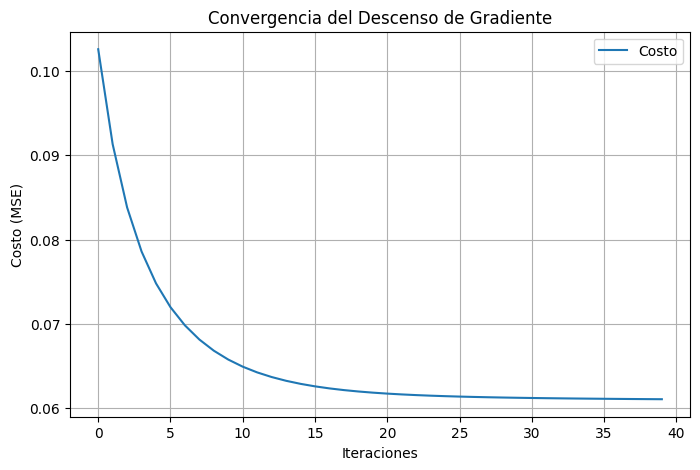

In [37]:
# 📈 Gráfica del costo
plt.figure(figsize=(8, 5))
plt.plot(range(len(cost_history)), cost_history, label='Costo')
plt.xlabel('Iteraciones')
plt.ylabel('Costo (MSE)')
plt.title('Convergencia del Descenso de Gradiente')
plt.legend()
plt.grid(True)
plt.show()


In [38]:
# 📊 Predicción en conjunto de prueba
y_pred = hypothesis(X_test_intercept, theta_final)

# 🎯 Redondear valores para clasificación (0 o 1)
y_pred_class = [1 if val >= 0.5 else 0 for val in y_pred]

# 📏 Métricas
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred_class)
report = classification_report(y_test, y_pred_class)

print(f"✅ Precisión: {accuracy:.4f}")
print("📋 Reporte de clasificación:")
print(report)


✅ Precisión: 0.8299
📋 Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      4942
           1       0.72      0.48      0.58      1571

    accuracy                           0.83      6513
   macro avg       0.79      0.71      0.74      6513
weighted avg       0.82      0.83      0.82      6513

